# Credit score development

Credit risk modelling plays a fundamental role in modern financial institutions by assessing the likelihood that a borrower will fail to meet their debt obligations. Accurate credit risk models enable banks and lenders to make informed lending decisions, manage portfolio risk, and comply with regulatory requirements.

The credit risk modelling aim is to estimate the probability of default (PD) for individual borrowers based on their demographic, financial, and credit-related characteristics. These models help financial institutions differentiate between high-risk and low-risk applicants, optimize pricing strategies, and reduce potential losses.

The most widespread machine learning methods such as logistic regression, decision trees, random forests, and gradient boosting have been widely adopted in credit risk modelling due to their predictive power and flexibility.

## Raw data

**The database contains synthetic data downloaded from the Kaggle website. From the distributions of the fields, it is do not reflect the reality (uniform distribution)!!!**

| **Column Name** | **Column Type** | **Description**                                                                                     |
| --------------- | --------------- | --------------------------------------------------------------------------------------------------- |
| LoanID          | Identifier      | Unique identifier for each loan.                                                                    |
| Age             | Feature         | Borrower’s age.                                                                                     |
| Income          | Feature         | Borrower’s annual income.                                                                           |
| LoanAmount      | Feature         | Amount of the loan taken.                                                                           |
| CreditScore     | Feature         | Borrower’s credit score indicating creditworthiness.                                                |
| MonthsEmployed  | Feature         | Length of the borrower’s employment in months.                                                      |
| NumCreditLines  | Feature         | Number of credit lines opened by the borrower.                                                      |
| InterestRate    | Feature         | Interest rate applied to the loan.                                                                  |
| LoanTerm        | Feature         | Loan term in months.                                                                                |
| DTIRatio        | Feature         | Debt-to-income ratio, measuring the borrower’s level of indebtedness.                               |
| Education       | Feature         | Highest level of education attained by the borrower (e.g., PhD, Master’s, Bachelor’s, High School). |
| EmploymentType  | Feature         | Type of employment (e.g., full-time, part-time, self-employed, unemployed).                         |
| MaritalStatus   | Feature         | Marital status of the borrower (e.g., single, married, divorced).                                   |
| HasMortgage     | Feature         | Indicates whether the borrower has a mortgage (Yes or No).                                          |
| HasDependents   | Feature         | Indicates whether the borrower has dependents (Yes or No).                                          |
| LoanPurpose     | Feature         | Purpose of the loan (e.g., home, auto, education, business, other).                                  |
| HasCoSigner     | Feature         | Indicates whether the loan has a co-signer (Yes or No).                                             |
| Default         | Target Variable | Binary target variable indicating whether a default occurred (1) or not (0).                        |

## Import main libraries and raw dataset (show first 200)

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itables
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.8f}'.format)
raw_data = pd.read_csv('Loan_default.csv')
itables.show(raw_data.head(200))

Loading ITables v2.6.2 from the internet... (need help?)


### Structure of raw data

In [445]:
print('data shape:',raw_data.shape)

data shape: (255347, 18)


In [446]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### Description statistic

In [447]:
raw_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000,255347.00000000
mean,43.49830623,82499.30459727,127578.86551242,574.26434616,59.54197621,2.50103585,13.49277348,36.02589418,0.50021206,0.11612825
std,14.99025842,38963.01372938,70840.70614150,158.90386659,34.64337564,1.11701767,6.63644306,16.96933003,0.23091662,0.32037928
min,18.00000000,15000.00000000,5000.00000000,300.00000000,0.00000000,1.00000000,2.00000000,12.00000000,0.10000000,0.00000000
25%,31.00000000,48825.50000000,66156.00000000,437.00000000,30.00000000,2.00000000,7.77000000,24.00000000,0.30000000,0.00000000
50%,43.00000000,82466.00000000,127556.00000000,574.00000000,60.00000000,2.00000000,13.46000000,36.00000000,0.50000000,0.00000000
75%,56.00000000,116219.00000000,188985.00000000,712.00000000,90.00000000,3.00000000,19.25000000,48.00000000,0.70000000,0.00000000
max,69.00000000,149999.00000000,249999.00000000,849.00000000,119.00000000,4.00000000,25.00000000,60.00000000,0.90000000,1.00000000


## Exploratory data analyzis

Since the data is synthetic, we will not need to manipulate it.

### Separate variable for descrete and countinous varible

In [448]:
countinous_variable = raw_data.select_dtypes(include=['number']).drop(columns=['Default'])
descrete_variable = raw_data.select_dtypes(include=['object']).drop(columns=['LoanID'])

### Missing values

In [449]:
result = {}

for col in raw_data.columns:
    result[col] = raw_data[col].isnull().sum()

result

{'LoanID': np.int64(0),
 'Age': np.int64(0),
 'Income': np.int64(0),
 'LoanAmount': np.int64(0),
 'CreditScore': np.int64(0),
 'MonthsEmployed': np.int64(0),
 'NumCreditLines': np.int64(0),
 'InterestRate': np.int64(0),
 'LoanTerm': np.int64(0),
 'DTIRatio': np.int64(0),
 'Education': np.int64(0),
 'EmploymentType': np.int64(0),
 'MaritalStatus': np.int64(0),
 'HasMortgage': np.int64(0),
 'HasDependents': np.int64(0),
 'LoanPurpose': np.int64(0),
 'HasCoSigner': np.int64(0),
 'Default': np.int64(0)}

Variables are not containing missing values.

### Unique values by descrete columns

In [450]:
dist_cat = {}

for col in descrete_variable.columns:
    dist_cat[col] = raw_data[col].unique()
    
display(dist_cat)

{'Education': array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object),
 'EmploymentType': array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
       dtype=object),
 'MaritalStatus': array(['Divorced', 'Married', 'Single'], dtype=object),
 'HasMortgage': array(['Yes', 'No'], dtype=object),
 'HasDependents': array(['Yes', 'No'], dtype=object),
 'LoanPurpose': array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object),
 'HasCoSigner': array(['Yes', 'No'], dtype=object)}

### Observation of duplicated records

In [451]:
raw_data.duplicated().sum()

np.int64(0)

### Default rate

In [452]:
default_rate = raw_data.loc[raw_data['Default'] == 1].shape[0] / raw_data.shape[0]
print(f"Default rate: {default_rate:.2%}")

Default rate: 11.61%


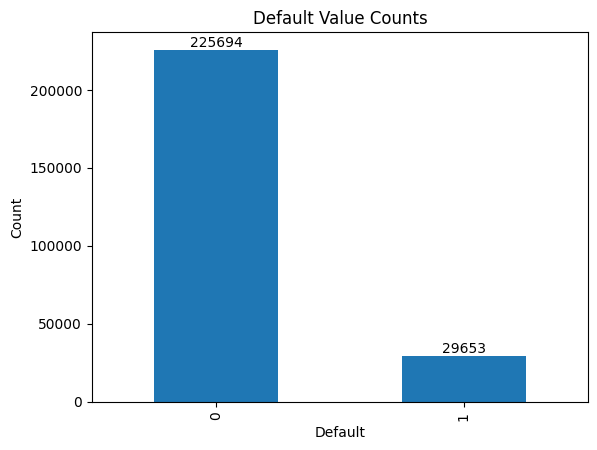

In [453]:
ax = raw_data['Default'].value_counts().plot(kind='bar')

plt.title('Default Value Counts')
plt.xlabel('Default')
plt.ylabel('Count')

ax.bar_label(ax.containers[0])

plt.show()

### Default count by categorical variable

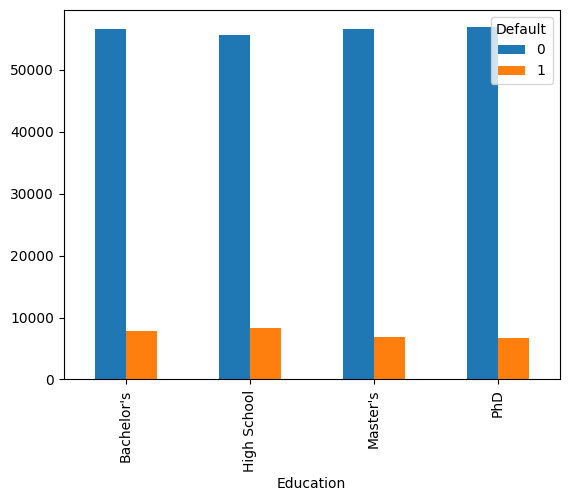

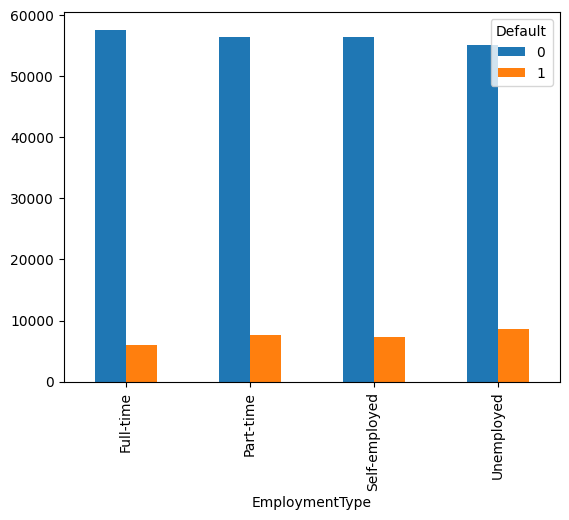

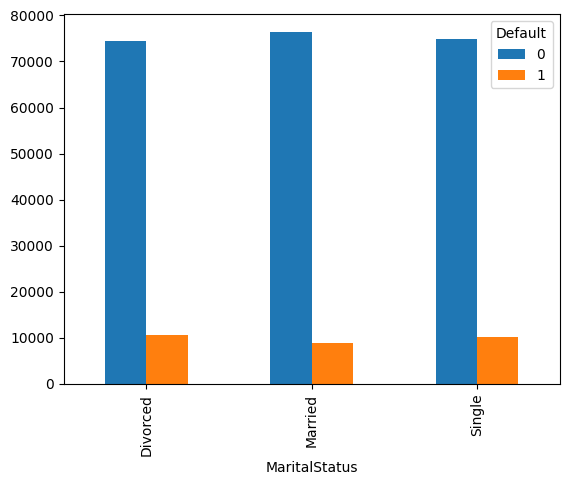

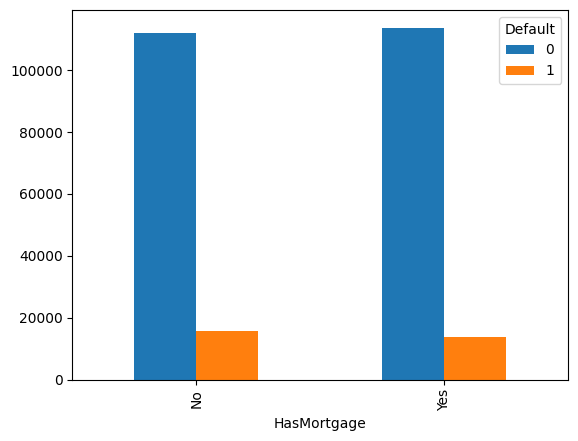

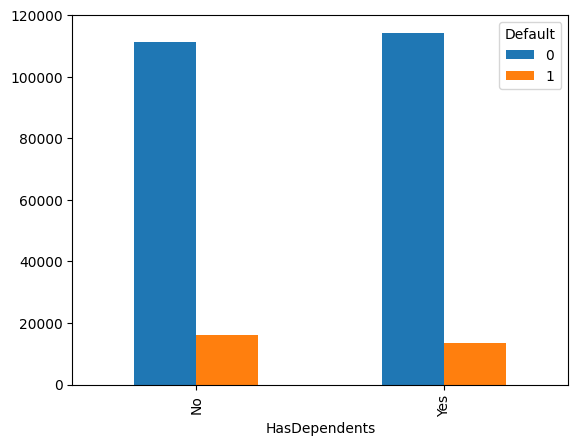

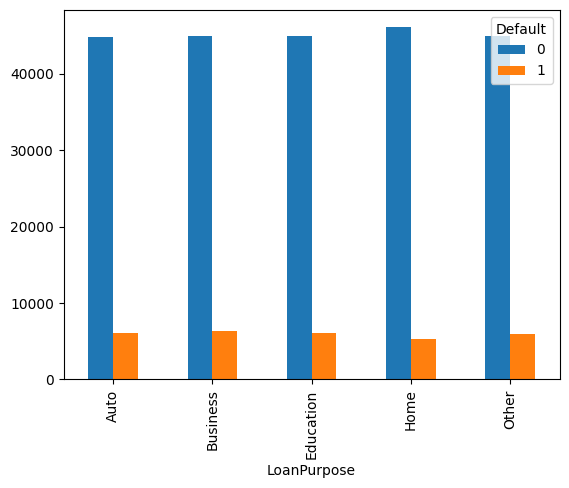

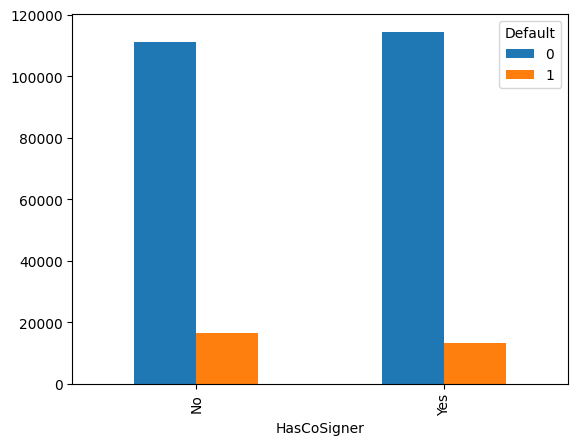

In [454]:
for i in descrete_variable:
    raw_data.groupby(i)["Default"].value_counts().unstack(fill_value=0).plot(kind='bar')
plt.show()

### Outliers observation

<Axes: >

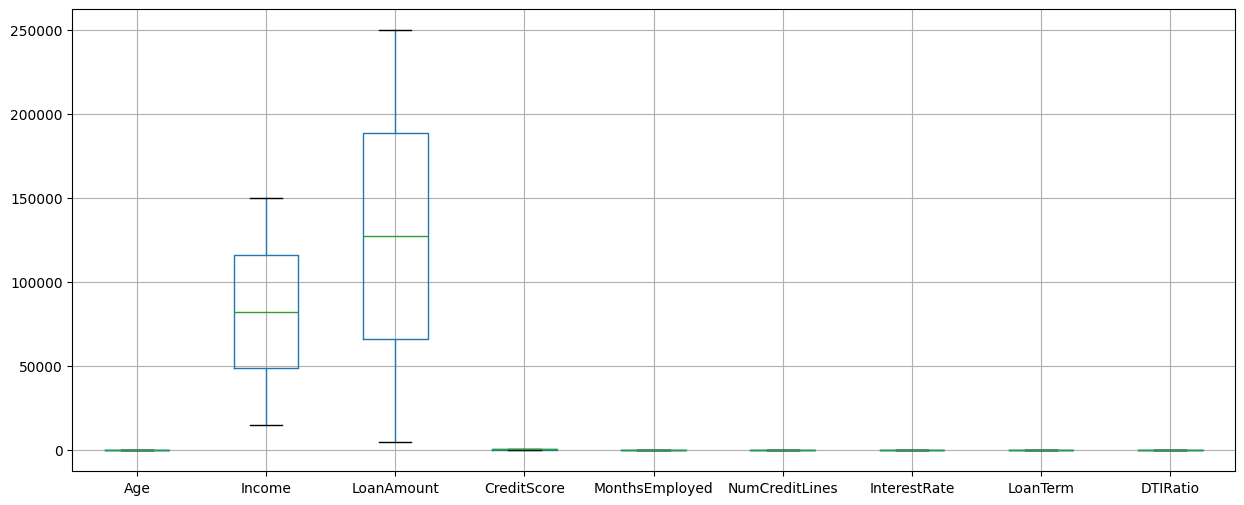

In [455]:
countinous_variable.boxplot(figsize=(15, 6))

### Histogramm of countinous variables

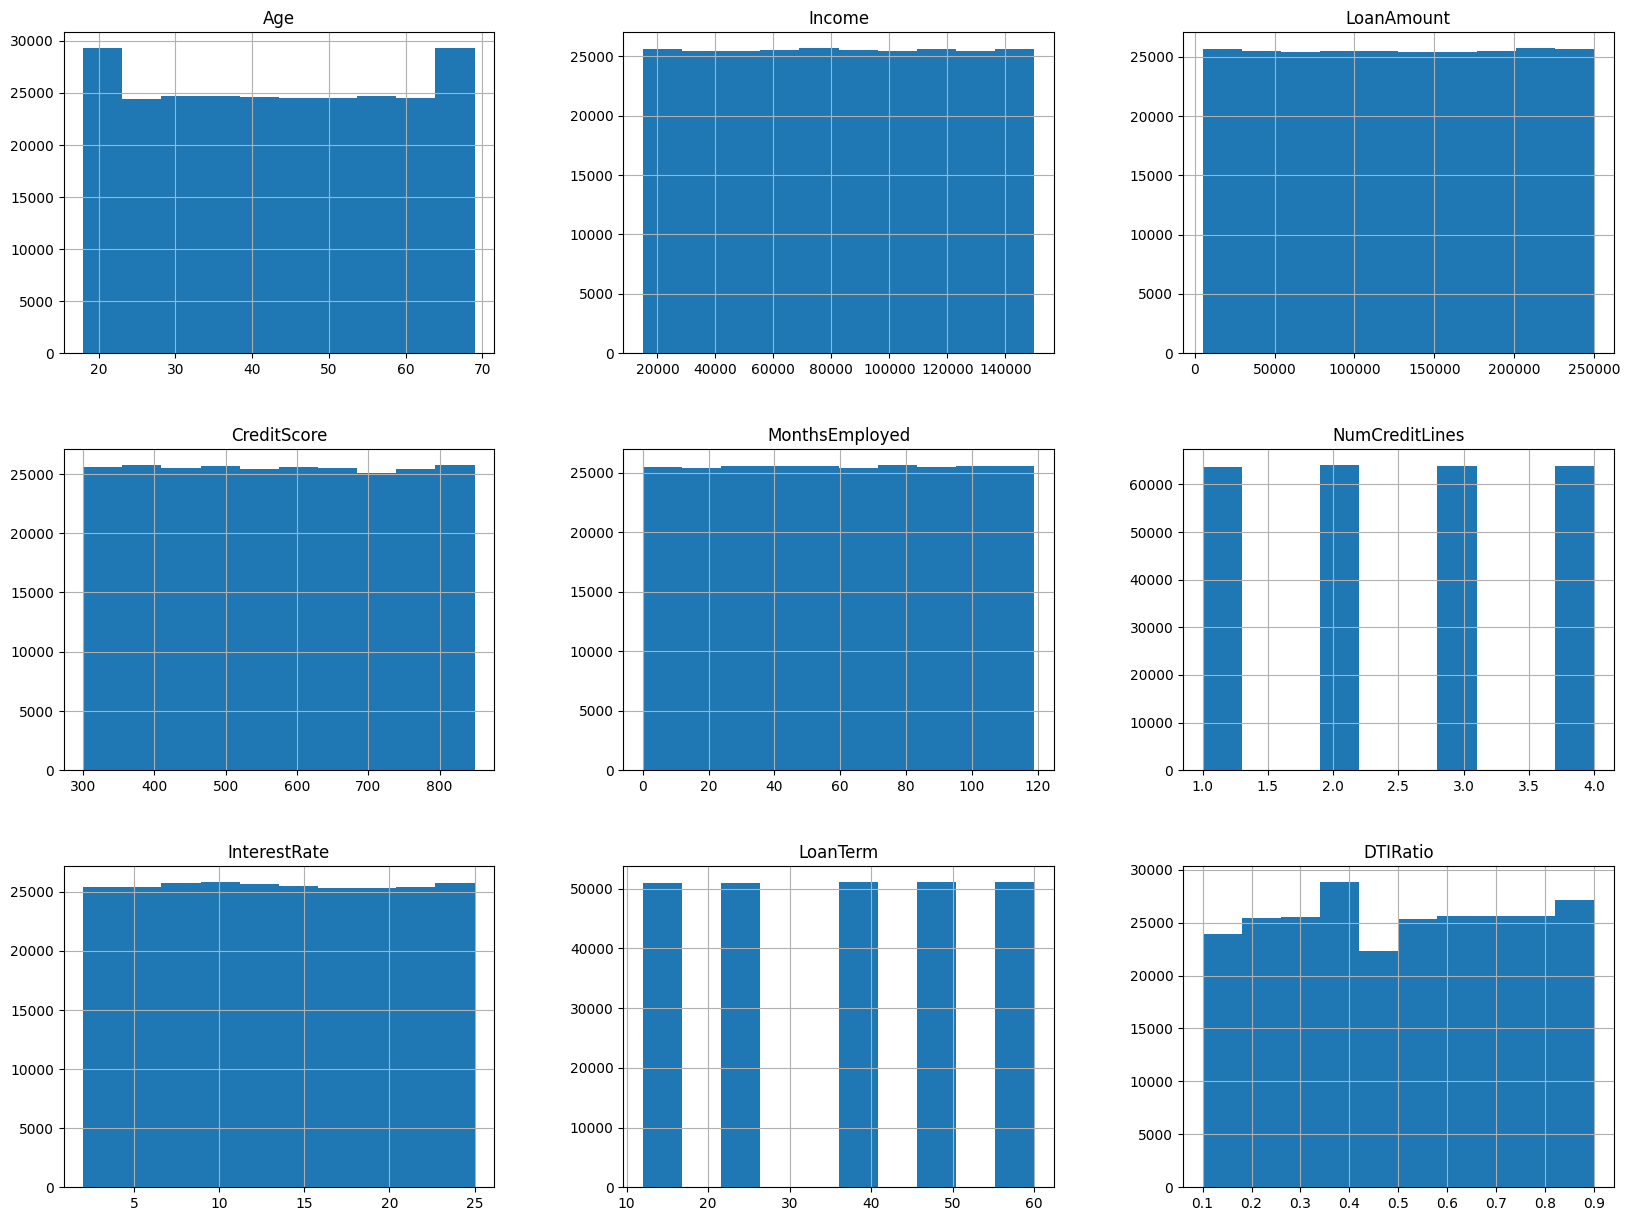

In [456]:
countinous_variable.hist(figsize=(20,15))
plt.show()

### Distribution of category variables

In [457]:
dist_cat = {}

for col in descrete_variable.columns:
    dist_cat[col] = raw_data[col].value_counts(normalize=True)

print(dist_cat)

{'Education': Education
Bachelor's    0.25207267
High School   0.25025945
Master's      0.24884177
PhD           0.24882611
Name: proportion, dtype: float64, 'EmploymentType': EmploymentType
Part-time       0.25126984
Unemployed      0.24995007
Self-employed   0.24948795
Full-time       0.24929214
Name: proportion, dtype: float64, 'MaritalStatus': MaritalStatus
Married    0.33406306
Divorced   0.33300959
Single     0.33292735
Name: proportion, dtype: float64, 'HasMortgage': HasMortgage
Yes   0.50001371
No    0.49998629
Name: proportion, dtype: float64, 'HasDependents': HasDependents
Yes   0.50026826
No    0.49973174
Name: proportion, dtype: float64, 'LoanPurpose': LoanPurpose
Business    0.20089525
Home        0.20084826
Education   0.19974779
Other       0.19939142
Auto        0.19911728
Name: proportion, dtype: float64, 'HasCoSigner': HasCoSigner
Yes   0.50010770
No    0.49989230
Name: proportion, dtype: float64}


### Correlation matrix

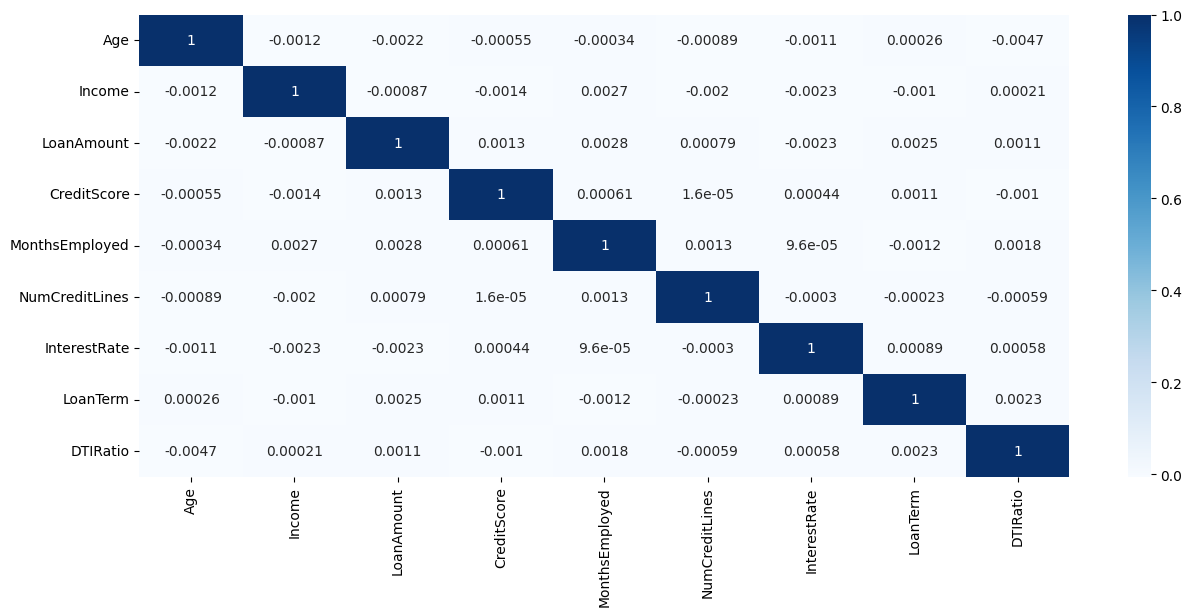

In [458]:
correlation = countinous_variable.corr()

fig, ax = plt.subplots(figsize = (15, 6))
sns.heatmap(correlation, cmap= 'Blues', annot=True, ax=ax)

plt.show()

## Weight of evidence and Information value and Gini index

Weight of Evidence (WoE) is a measure used to quantify the predictive power of a categorical or binned continuous variable with respect to a binary target variable. This transformation helps in understanding the strength of the relationship between a predictor and the target variable, and it is especially useful for logistic regression models.

$$WoE_i = ln(\frac{Good_i/Total Good}{Bad_i/Total_bad})$$

Information Value (IV) is a summary metric derived from WoE, used to assess the overall predictive power of a variable. It aggregates the contribution of all bins to measure how well the variable separates good and bad outcomes.

$$IV = \sum_{i=1}^{n} (P(Good_i) - P(Bad_i)) \cdot \ln\left(\frac{P(Good_i)}{P(Bad_i)}\right)$$

|**Information Value (IV)**|**Predictive Power of Variable**|
|--------------------------|------------------------------|
|IV <= 0.02|Useless for prediction|
|0.02 < IV <= 0.10|Weak predictor|
|0.10 < IV <= 0.30|Medium predictor|
|0.30 < IV <= 0.50|Strong predictor|
|IV > 0.50|Suspicious behaviour|

### Binning process

The binning process is a data preprocessing technique used to convert continuous variables into categorical bins (intervals or groups).

In [459]:
from optbinning import BinningProcess
from optbinning import OptimalBinning

woe_X = raw_data.iloc[:,1:-1] #exclude the ID  and year columns
woe_y = raw_data.iloc[:,-1]

binning_process = BinningProcess(woe_X.columns.tolist(),
                                 categorical_variables=list(descrete_variable),
                                 max_n_prebins=100,
                                 min_n_bins=2,
                                 max_n_bins=6,
                                 max_pvalue=0.05
                                )

binning_process.fit(woe_X, woe_y)

,variable_names,"['Age', 'Income', ...]"
,max_n_prebins,100
,min_prebin_size,0.05
,min_n_bins,2
,max_n_bins,6
,min_bin_size,None
,max_bin_size,None
,max_pvalue,0.05
,max_pvalue_policy,'consecutive'
,selection_criteria,None
,fixed_variables,None


### Summary of binning process result (IV & Gini)

In [460]:
binning_process.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,Age,numerical,OPTIMAL,True,6,0.28363067,0.03469442,0.29530316,0.85675023
1,Income,numerical,OPTIMAL,True,6,0.13180708,0.01609401,0.17007142,0.34379714
2,LoanAmount,numerical,OPTIMAL,True,6,0.07459961,0.00927400,0.15354251,0.28302708
3,CreditScore,numerical,OPTIMAL,True,6,0.01208440,0.00150884,0.06165496,0.04630611
4,MonthsEmployed,numerical,OPTIMAL,True,6,0.09374733,0.01163422,0.17246871,0.35815600
5,NumCreditLines,numerical,OPTIMAL,True,4,0.00790246,0.00098729,0.04943170,0.02956407
6,InterestRate,numerical,OPTIMAL,True,6,0.17131613,0.02113732,0.23103894,0.61609157
7,LoanTerm,numerical,INFEASIBLE,True,1,0.00000000,0.00000000,0,0.00000000
8,DTIRatio,numerical,OPTIMAL,True,4,0.00421516,0.00052668,0.03507512,0.01517091
9,Education,categorical,OPTIMAL,True,3,0.00801996,0.00100207,0.04764056,0.02614588


### Selected useful variable based on IV

In [461]:
summary = binning_process.summary()
useful_var = summary.loc[summary['iv'] >= 0.02]
useful_var

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,Age,numerical,OPTIMAL,True,6,0.28363067,0.03469442,0.29530316,0.85675023
1,Income,numerical,OPTIMAL,True,6,0.13180708,0.01609401,0.17007142,0.34379714
2,LoanAmount,numerical,OPTIMAL,True,6,0.07459961,0.00927400,0.15354251,0.28302708
4,MonthsEmployed,numerical,OPTIMAL,True,6,0.09374733,0.01163422,0.17246871,0.35815600
6,InterestRate,numerical,OPTIMAL,True,6,0.17131613,0.02113732,0.23103894,0.61609157
10,EmploymentType,categorical,OPTIMAL,True,4,0.02063346,0.00257458,0.07769562,0.07686327


### Show useful varible's categories based on binning

In [462]:
for var in list(useful_var['name']):
    optb = binning_process.get_binned_variable(var)
    table = pd.DataFrame(optb.binning_table.build())
    table.insert(0, "Variable", var)

    display(table)

,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,Age,"(-inf, 22.50)",24567,0.09621026,19209,5358,0.21809745,-0.75282865,0.07195474,0.00878779
1,Age,"[22.50, 28.50)",29191,0.11431895,23781,5410,0.18533110,-0.54897895,0.04231270,0.00522366
2,Age,"[28.50, 38.50)",49383,0.19339565,42140,7243,0.14666991,-0.26865488,0.01545991,0.00192670
3,Age,"[38.50, 47.50)",44321,0.17357165,39658,4663,0.10520972,0.11101688,0.00204977,0.00025609
4,Age,"[47.50, 57.50)",49157,0.19251058,45272,3885,0.07903249,0.42594896,0.02963530,0.00367666
5,Age,"[57.50, inf)",58728,0.22999291,55634,3094,0.05268356,0.85971297,0.12221826,0.01482353
6,Age,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
7,Age,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,Age,,255347,1.00000000,225694,29653,0.11612825,,0.28363067,0.03469442


,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,Income,"(-inf, 21780.50)",12771,0.05001429,9450,3321,0.26004228,-0.98386800,0.06899331,0.00829233
1,Income,"[21780.50, 30194.50)",16027,0.06276557,13036,2991,0.18662257,-0.55750982,0.02403261,0.00296577
2,Income,"[30194.50, 38698.50)",15900,0.06226821,13542,2358,0.14830189,-0.28163463,0.00549700,0.00068486
3,Income,"[38698.50, 48337.50)",18209,0.07131080,15879,2330,0.12795870,-0.11048758,0.00090812,0.00011346
4,Income,"[48337.50, 65891.00)",33270,0.13029329,29559,3711,0.11154193,0.04547009,0.00026472,0.00003309
5,Income,"[65891.00, inf)",159170,0.62334784,144228,14942,0.09387447,0.23760254,0.03211132,0.00400450
6,Income,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
7,Income,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,Income,,255347,1.00000000,225694,29653,0.11612825,,0.13180708,0.01609401


,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,LoanAmount,"(-inf, 38926.00)",35528,0.13913616,32759,2769,0.07793853,0.44107469,0.02283345,0.00283127
1,LoanAmount,"[38926.00, 84561.50)",47383,0.18556317,43140,4243,0.08954688,0.28956328,0.01391507,0.00173333
2,LoanAmount,"[84561.50, 142355.50)",59998,0.23496654,53519,6479,0.10798693,0.08185375,0.00152550,0.00019063
3,LoanAmount,"[142355.50, 182409.00)",41788,0.16365181,36529,5259,0.12584953,-0.09145123,0.00141745,0.00017712
4,LoanAmount,"[182409.00, 195427.50)",13395,0.05245803,11536,1859,0.13878313,-0.20418293,0.00236410,0.00029500
5,LoanAmount,"[195427.50, inf)",57255,0.22422429,48211,9044,0.15796000,-0.35613114,0.03254405,0.00404664
6,LoanAmount,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
7,LoanAmount,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,LoanAmount,,255347,1.00000000,225694,29653,0.11612825,,0.07459961,0.00927400


,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,MonthsEmployed,"(-inf, 17.50)",38409,0.15041884,31958,6451,0.16795543,-0.42942942,0.03261553,0.00404590
1,MonthsEmployed,"[17.50, 29.50)",25188,0.09864224,21372,3816,0.15150071,-0.30673790,0.01042722,0.00129832
2,MonthsEmployed,"[29.50, 55.50)",55413,0.21701058,48390,7023,0.12673921,-0.09951410,0.00223251,0.00027895
3,MonthsEmployed,"[55.50, 76.50)",44748,0.17524388,39993,4755,0.10626173,0.09989094,0.00168270,0.00021025
4,MonthsEmployed,"[76.50, 99.50)",48894,0.19148061,44450,4444,0.09089050,0.27319329,0.01286229,0.00160281
5,MonthsEmployed,"[99.50, inf)",42695,0.16720384,39531,3164,0.07410704,0.49563133,0.03392708,0.00419800
6,MonthsEmployed,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
7,MonthsEmployed,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,MonthsEmployed,,255347,1.00000000,225694,29653,0.11612825,,0.09374733,0.01163422


,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,InterestRate,"(-inf, 6.02)",44351,0.17368914,41628,2723,0.06139659,0.69742201,0.06459216,0.00791427
1,InterestRate,"[6.02, 9.90)",43481,0.17028201,40028,3453,0.07941400,0.42071899,0.02562527,0.00317974
2,InterestRate,"[9.90, 12.64)",30711,0.12027163,27718,2993,0.09745694,0.19618899,0.00429226,0.00053567
3,InterestRate,"[12.64, 16.87)",46728,0.18299804,41165,5563,0.11905068,-0.02816595,0.00014675,0.00001834
4,InterestRate,"[16.87, 20.38)",38852,0.15215374,33174,5678,0.14614434,-0.26444942,0.01176663,0.00146656
5,InterestRate,"[20.38, inf)",51224,0.20060545,41981,9243,0.18044276,-0.51626617,0.06489306,0.00802273
6,InterestRate,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
7,InterestRate,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,InterestRate,,255347,1.00000000,225694,29653,0.11612825,,0.17131613,0.02113732


,Variable,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,EmploymentType,[Full-time],63656,0.24929214,57632,6024,0.09463366,0.22870968,0.01193975,0.00148922
1,EmploymentType,[Self-employed],63706,0.24948795,56404,7302,0.11462029,0.01477500,0.00005416,0.00000677
2,EmploymentType,[Part-time],64161,0.25126984,56484,7677,0.11965213,-0.03388823,0.00029234,0.00003654
3,EmploymentType,[Unemployed],63824,0.24995007,55174,8650,0.13552895,-0.17668429,0.00834721,0.00104205
4,EmploymentType,Special,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
5,EmploymentType,Missing,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.00000000
Totals,EmploymentType,,255347,1.00000000,225694,29653,0.11612825,,0.02063346,0.00257458


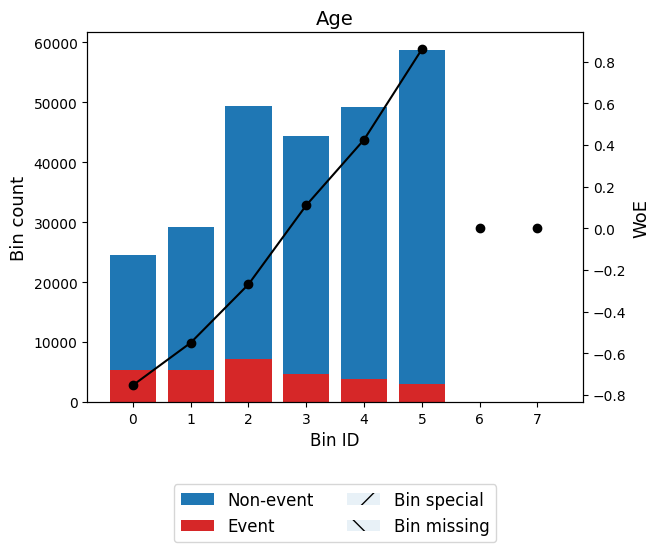

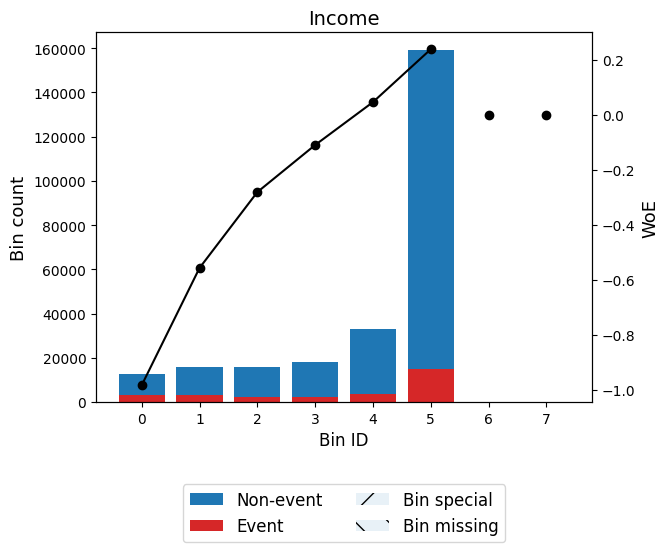

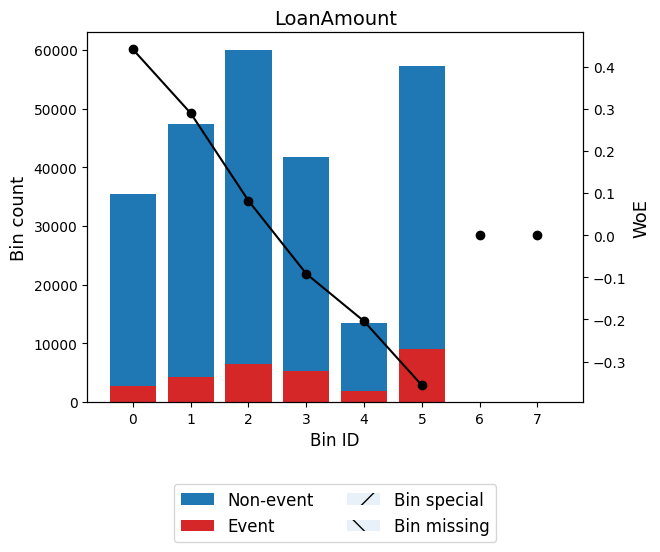

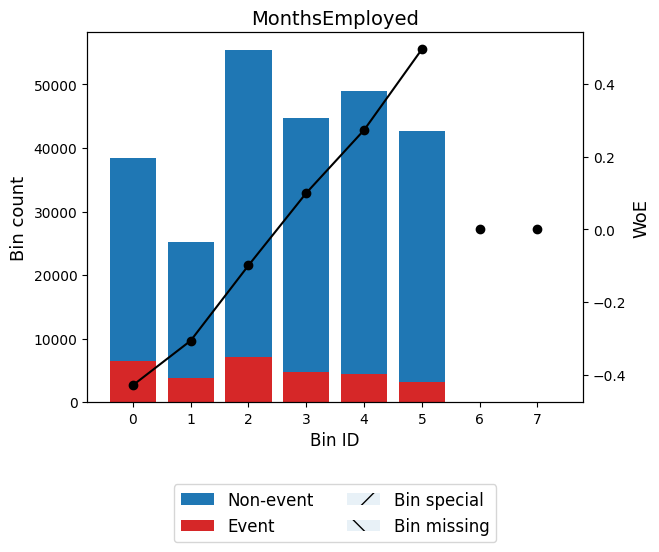

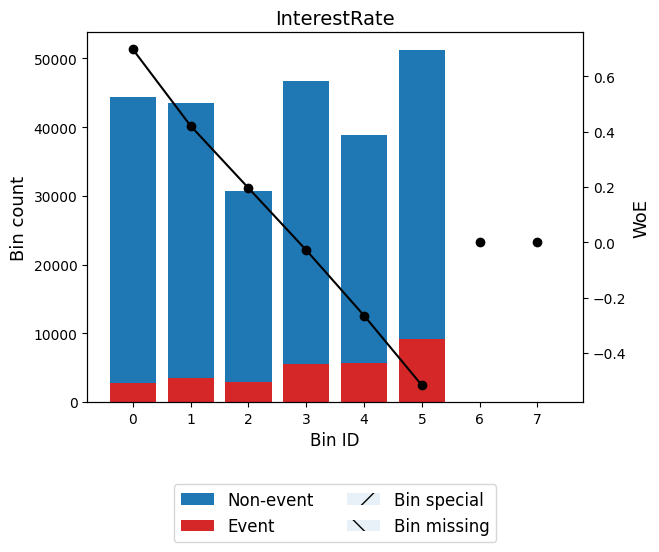

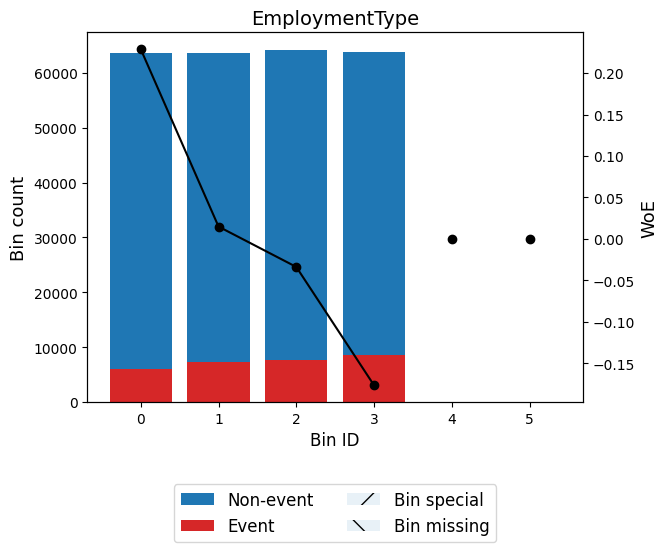

In [463]:
for var in list(useful_var['name']):
    optb = binning_process.get_binned_variable(var)
    plot = optb.binning_table.plot(metric="woe")

## Final datasets creation

In [464]:
list(useful_var.name)

['Age',
 'Income',
 'LoanAmount',
 'MonthsEmployed',
 'InterestRate',
 'EmploymentType']

### Modeling dataset

Select data which we use for modeling

In [465]:
final_data = raw_data[[
    'LoanID',
    'Age',
    'Income',
    'LoanAmount',
    'MonthsEmployed',
    'InterestRate',
    'EmploymentType',
    'Default']]
final_data.head()

,LoanID,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,Default
0,I38PQUQS96,56,85994,50587,80,15.23000000,Full-time,0
1,HPSK72WA7R,69,50432,124440,15,4.81000000,Full-time,0
2,C1OZ6DPJ8Y,46,84208,129188,26,21.17000000,Unemployed,1
3,V2KKSFM3UN,32,31713,44799,0,7.07000000,Full-time,0
4,EY08JDHTZP,60,20437,9139,8,6.51000000,Unemployed,0


## Feature engineering

In [466]:
model_data = final_data.copy()

### Dummy data creation based on binning categories

In [467]:
# Age
model_data['Age: -22.50'] = np.where((model_data['Age'] <= 22.5 ), 1, 0)
model_data['Age: 22.50, 28.50'] = np.where((model_data['Age'] > 22.50 ) & (model_data['Age'] <= 28.50 ), 1, 0)
model_data['Age: 28.50, 38.50'] = np.where((model_data['Age'] > 28.50 ) & (model_data['Age'] <= 38.50 ), 1, 0)
model_data['Age: 38.50, 47.50'] = np.where((model_data['Age'] > 38.50 ) & (model_data['Age'] <= 47.50 ), 1, 0)
model_data['Age: 47.50, 57.50'] = np.where((model_data['Age'] > 47.50 ) & (model_data['Age'] <= 57.50 ), 1, 0)
model_data['Age: 57.50-'] = np.where((model_data['Age'] > 57.50 ), 1, 0)

# Income
model_data['Income: -21780.50'] = np.where((model_data['Income'] <= 21780.50 ), 1, 0)
model_data['Income: 21780.50, 30194.50'] = np.where((model_data['Income'] > 21780.50 ) & (model_data['Income'] <= 30194.50 ), 1, 0)
model_data['Income: 30194.50, 38698.50'] = np.where((model_data['Income'] > 30194.50 ) & (model_data['Income'] <= 38698.50 ), 1, 0)
model_data['Income: 38698.50, 48337.50'] = np.where((model_data['Income'] > 38698.50 ) & (model_data['Income'] <= 48337.50 ), 1, 0)
model_data['Income: 48337.50, 65891.00'] = np.where((model_data['Income'] > 48337.50 ) & (model_data['Income'] <= 65891.00 ), 1, 0)
model_data['Income: 65891.00-'] = np.where((model_data['Income'] > 65891.00 ), 1, 0)

# LoanAmount
model_data['LoanAmount: -38926.00'] = np.where((model_data['LoanAmount'] <= 38926.00 ), 1, 0)
model_data['LoanAmount: 38926.00, 84561.50'] = np.where((model_data['LoanAmount'] > 39143.44 ) & (model_data['LoanAmount'] <= 84561.50 ), 1, 0)
model_data['LoanAmount: 84561.50, 142355.50'] = np.where((model_data['LoanAmount'] > 84561.50 ) & (model_data['LoanAmount'] <= 142355.50 ), 1, 0)
model_data['LoanAmount: 142355.50, 182409.00'] = np.where((model_data['LoanAmount'] > 142355.50 ) & (model_data['LoanAmount'] <= 182409.00 ), 1, 0)
model_data['LoanAmount: 182409.00, 195427.50'] = np.where((model_data['LoanAmount'] > 182409.00 ) & (model_data['LoanAmount'] <= 195427.50 ), 1, 0)
model_data['LoanAmount: 195427.50-'] = np.where((model_data['LoanAmount'] > 196485.88 ), 1, 0)

#MonthsEmployed
model_data['MonthsEmployed: -17.50'] = np.where((model_data['MonthsEmployed'] <= 17.50 ), 1, 0)
model_data['MonthsEmployed: 17.50, 29.50'] = np.where((model_data['MonthsEmployed'] > 17.50 ) & (model_data['MonthsEmployed'] <= 29.50 ), 1, 0)
model_data['MonthsEmployed: 29.50, 55.50'] = np.where((model_data['MonthsEmployed'] > 29.50 ) & (model_data['MonthsEmployed'] <= 55.50 ), 1, 0)
model_data['MonthsEmployed: 55.50, 76.50'] = np.where((model_data['MonthsEmployed'] > 55.50 ) & (model_data['MonthsEmployed'] <= 76.50 ), 1, 0)
model_data['MonthsEmployed: 76.50, 99.50'] = np.where((model_data['MonthsEmployed'] > 76.50 ) & (model_data['MonthsEmployed'] <= 99.50 ), 1, 0)
model_data['MonthsEmployed: 99.50-'] = np.where((model_data['MonthsEmployed'] > 99.50 ), 1, 0)

#InterestRate
model_data['InterestRate: -6.02'] = np.where((model_data['InterestRate'] <= 6.02 ), 1, 0)
model_data['InterestRate: 6.02, 9.90'] = np.where((model_data['InterestRate'] > 6.02 ) & (model_data['InterestRate'] <= 9.90 ), 1, 0)
model_data['InterestRate: 9.90, 12.64'] = np.where((model_data['InterestRate'] > 9.90 ) & (model_data['InterestRate'] <= 12.64 ), 1, 0)
model_data['InterestRate: 12.64, 16.87'] = np.where((model_data['InterestRate'] > 12.64 ) & (model_data['InterestRate'] <= 16.87 ), 1, 0)
model_data['InterestRate: 16.87, 20.38'] = np.where((model_data['InterestRate'] > 16.87 ) & (model_data['InterestRate'] <= 20.38 ), 1, 0)
model_data['InterestRate: 20.38-'] = np.where((model_data['InterestRate'] > 20.38 ), 1, 0)

#EmploymentType
model_data['EmploymentType: Full-time'] = np.where((model_data['EmploymentType'].isin(['Full-time'])), 1, 0)
model_data['EmploymentType: Part-time'] = np.where((model_data['EmploymentType'].isin(['Part-time'])), 1, 0)
model_data['EmploymentType: Self-employed'] = np.where((model_data['EmploymentType'].isin(['Self-employed'])), 1, 0)
model_data['EmploymentType: Unemployed'] = np.where((model_data['EmploymentType'].isin(['Unemployed'])), 1, 0)


model_data = model_data.drop(columns=['Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'InterestRate', 'EmploymentType'])
model_data['Default'] = model_data.pop('Default')
model_data

,LoanID,Age: -22.50,"Age: 22.50, 28.50","Age: 28.50, 38.50","Age: 38.50, 47.50","Age: 47.50, 57.50",Age: 57.50-,Income: -21780.50,"Income: 21780.50, 30194.50","Income: 30194.50, 38698.50","Income: 38698.50, 48337.50","Income: 48337.50, 65891.00",Income: 65891.00-,LoanAmount: -38926.00,"LoanAmount: 38926.00, 84561.50","LoanAmount: 84561.50, 142355.50","LoanAmount: 142355.50, 182409.00","LoanAmount: 182409.00, 195427.50",LoanAmount: 195427.50-,MonthsEmployed: -17.50,"MonthsEmployed: 17.50, 29.50","MonthsEmployed: 29.50, 55.50","MonthsEmployed: 55.50, 76.50","MonthsEmployed: 76.50, 99.50",MonthsEmployed: 99.50-,InterestRate: -6.02,"InterestRate: 6.02, 9.90","InterestRate: 9.90, 12.64","InterestRate: 12.64, 16.87","InterestRate: 16.87, 20.38",InterestRate: 20.38-,EmploymentType: Full-time,EmploymentType: Part-time,EmploymentType: Self-employed,EmploymentType: Unemployed,Default
0,I38PQUQS96,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,HPSK72WA7R,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,C1OZ6DPJ8Y,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,V2KKSFM3UN,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,EY08JDHTZP,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
255343,98R4KDHNND,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
255344,XQK1UUUNGP,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
255345,JAO28CPL4H,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


### Exclude one category as reference category

**Reference categories:** Age: -22.50, Income: -21780.50, LoanAmount: -38926.00, MonthsEmployed: -17.50, InterestRate: -6.02, EmploymentType: Full-time

In [468]:
model_data = model_data.drop(['Age: -22.50', 'Income: -21780.50', 'LoanAmount: -38926.00', 'MonthsEmployed: -17.50', 'InterestRate: -6.02', 'EmploymentType: Full-time'], axis=1)
model_data

,LoanID,"Age: 22.50, 28.50","Age: 28.50, 38.50","Age: 38.50, 47.50","Age: 47.50, 57.50",Age: 57.50-,"Income: 21780.50, 30194.50","Income: 30194.50, 38698.50","Income: 38698.50, 48337.50","Income: 48337.50, 65891.00",Income: 65891.00-,"LoanAmount: 38926.00, 84561.50","LoanAmount: 84561.50, 142355.50","LoanAmount: 142355.50, 182409.00","LoanAmount: 182409.00, 195427.50",LoanAmount: 195427.50-,"MonthsEmployed: 17.50, 29.50","MonthsEmployed: 29.50, 55.50","MonthsEmployed: 55.50, 76.50","MonthsEmployed: 76.50, 99.50",MonthsEmployed: 99.50-,"InterestRate: 6.02, 9.90","InterestRate: 9.90, 12.64","InterestRate: 12.64, 16.87","InterestRate: 16.87, 20.38",InterestRate: 20.38-,EmploymentType: Part-time,EmploymentType: Self-employed,EmploymentType: Unemployed,Default
0,I38PQUQS96,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,HPSK72WA7R,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1OZ6DPJ8Y,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,V2KKSFM3UN,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,EY08JDHTZP,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
255343,98R4KDHNND,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
255344,XQK1UUUNGP,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
255345,JAO28CPL4H,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


## Modeling

### Feature selection

#### Multicollinearity analysis
VIF (Variance Infaltion Factor) is used to detect multicollinearity among predictors in a regression model.

$$VIF = \frac{1}{1-R_i^2}$$

|**Varience Inflation Factor (VIF)**|**Interpretation**|
|--------------------------|------------------------------|
|VIF = 1|No correlated|
|1 < VIF < 5|Moderately correlated|
|VIF > 5|Highly correlated|
|VIF > 10|Significantly correlated|

In [469]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

cons = add_constant(model_data.drop(['Default', 'LoanID'], axis=1))

vif_df = pd.DataFrame({
    'feature': model_data.drop(['Default', 'LoanID'], axis=1).columns,
    'VIF': [variance_inflation_factor(cons.values, i)
            for i in range(model_data.drop(['Default', 'LoanID'], axis=1).shape[1])]
})

vif_df

,feature,VIF
0,"Age: 22.50, 28.50",48.85777935
1,"Age: 28.50, 38.50",1.93824516
2,"Age: 38.50, 47.50",2.42813561
3,"Age: 47.50, 57.50",2.31749345
4,Age: 57.50-,2.42336595
5,"Income: 21780.50, 30194.50",2.61086453
6,"Income: 30194.50, 38698.50",2.11368134
7,"Income: 38698.50, 48337.50",2.10542711
8,"Income: 48337.50, 65891.00",2.25297876
9,Income: 65891.00-,3.13563932


**Multicollinearity is detected for the 'age' variable (bin: Age: 22.50, 28.50 = 48.72). Due to for one bin do not remove this variable from the dataset.**

### Train, test data separation

In [470]:
from sklearn.model_selection import train_test_split

X = model_data.iloc[:,1:-1]
y = model_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(204277, 28) (204277,) (51070, 28) (51070,)


### Logistic regression model

#### Model summary

In [471]:
import statsmodels.api as sm

X_train_con = sm.add_constant(X_train, prepend=False)

logit_model = sm.Logit(y_train, X_train_con)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.317496
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               204277
Model:                          Logit   Df Residuals:                   204248
Method:                           MLE   Df Model:                           28
Date:                Tue, 06 Jan 2026   Pseudo R-squ.:                  0.1145
Time:                        21:41:40   Log-Likelihood:                -64857.
converged:                       True   LL-Null:                       -73245.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age: 22.50, 28.50                   -0.2354      0.025     -9.32

#### Full model (features with reference category)

In [472]:
full_model = pd.DataFrame({
    'Feature': result.params.index.values,
    'Coefficient': result.params.values
})
full_model = full_model.reset_index(drop=True)

# new table
zero_con = pd.DataFrame({
    'Feature': ['Age: -22.50',
              'Income: -21780.50',
              'LoanAmount: -38926.00',
              'MonthsEmployed: -17.50',
              'InterestRate: -6.02',
              'EmploymentType: Full-time'],
    'Coefficient': [0.00000000]*6
})

full_model = pd.concat([full_model, zero_con])

full_model = full_model.sort_values(by='Feature')
full_model = full_model.reset_index(drop=True)
full_model

,Feature,Coefficient
0,Age: -22.50,0.00000000
1,"Age: 22.50, 28.50",-0.23536223
2,"Age: 28.50, 38.50",-0.53872958
3,"Age: 38.50, 47.50",-0.94335719
4,"Age: 47.50, 57.50",-1.28007592
5,Age: 57.50-,-1.71094213
6,EmploymentType: Full-time,0.00000000
7,EmploymentType: Part-time,0.28704250
8,EmploymentType: Self-employed,0.22808601
9,EmploymentType: Unemployed,0.44504391


## PD calculation

Using the logistic regression formula, we substitute the betas and the intercept to calculate the PD values for all customers.

$$PD = \frac{1}{1 + e^{-(\beta_0 + \sum \beta_i)}}$$

### Mapping betas for cases and calculating logit and PD

In [473]:
df_score = final_data.copy()

intercept = -1.10248710

def age_beta(age):
    if 22.5 < age <= 28.5:
        return -0.23536223
    elif 28.5 < age <= 38.5:
        return -0.53872958
    elif 38.5 < age <= 47.5:
        return -0.94335719
    elif 47.5 < age <= 57.5:
        return -1.28007592
    elif age > 57.5:
        return -1.71094213
    else:
        return 0.0

def income_beta(x):
    if 21780.5 < x <= 30194.5:
        return -0.50474548
    elif 30194.5 < x <= 38698.5:
        return -0.79516293
    elif 38698.5 < x <= 48337.5:
        return -0.96833667
    elif 48337.5 < x <= 65891.0:
        return -1.16221464
    elif x > 65891.0:
        return -1.35015397
    else:
        return 0.0

def beta_loanamount(x):
    if 38926.0 < x <= 84561.5:
        return 0.15066763
    elif 84561.5 < x <= 142355.5:
        return 0.36807216
    elif 142355.5 < x <= 182409.0:
        return 0.54678370
    elif 182409.0 < x <= 195427.5:
        return 0.69840725
    elif x > 195427.5:
        return 0.84862776
    else:
        return 0.0

def beta_months(x):
    if 17.5 < x <= 29.5:
        return -0.16659042
    elif 29.5 < x <= 55.5:
        return -0.36936714
    elif 55.5 < x <= 76.5:
        return -0.57708860
    elif 76.5 < x <= 99.5:
        return -0.79647601
    elif x > 99.5:
        return -1.01399480
    else:
        return 0.0

def beta_interest(x):
    if 6.02 < x <= 9.90:
        return 0.28825258
    elif 9.90 < x <= 12.64:
        return 0.53640642
    elif 12.64 < x <= 16.87:
        return 0.78597910
    elif 16.87 < x <= 20.38:
        return 1.03381998
    elif x > 20.38:
        return 1.31528886
    else:
        return 0.0

employment_beta = {
    "Full-time": 0.00000000,
    "Part-time": 0.28704250,
    "Self-employed": 0.22808601,
    "Unemployed": 0.44504391
}

df_score["beta_age"] = df_score["Age"].apply(age_beta)
df_score["beta_income"] = df_score["Income"].apply(income_beta)
df_score["beta_loanamount"] = df_score["LoanAmount"].apply(beta_loanamount)
df_score["beta_months_employed"] = df_score["MonthsEmployed"].apply(beta_months)
df_score["beta_interest"] = df_score["InterestRate"].apply(beta_interest)
df_score["beta_employment"] = (
    df_score["EmploymentType"]
    .map(employment_beta)
    .fillna(0.0)
)

beta_cols = [
    "beta_age",
    "beta_income",
    "beta_loanamount",
    "beta_months_employed",
    "beta_interest",
    "beta_employment"
]

df_score["Logit"] = intercept + df_score[beta_cols].sum(axis=1)
df_score["PD"] = 1 / (1 + np.exp(-df_score["Logit"]))
df_score

,LoanID,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,Default,beta_age,beta_income,beta_loanamount,beta_months_employed,beta_interest,beta_employment,Logit,PD
0,I38PQUQS96,56,85994,50587,80,15.23000000,Full-time,0,-1.28007592,-1.35015397,0.15066763,-0.79647601,0.78597910,0.00000000,-3.59254627,0.02679065
1,HPSK72WA7R,69,50432,124440,15,4.81000000,Full-time,0,-1.71094213,-1.16221464,0.36807216,0.00000000,0.00000000,0.00000000,-3.60757171,0.02640167
2,C1OZ6DPJ8Y,46,84208,129188,26,21.17000000,Unemployed,1,-0.94335719,-1.35015397,0.36807216,-0.16659042,1.31528886,0.44504391,-1.43418375,0.19244764
3,V2KKSFM3UN,32,31713,44799,0,7.07000000,Full-time,0,-0.53872958,-0.79516293,0.15066763,0.00000000,0.28825258,0.00000000,-1.99745940,0.11946993
4,EY08JDHTZP,60,20437,9139,8,6.51000000,Unemployed,0,-1.71094213,0.00000000,0.00000000,0.00000000,0.28825258,0.44504391,-2.08013274,0.11104286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,109,14.11000000,Full-time,0,0.00000000,-0.79516293,0.84862776,-1.01399480,0.78597910,0.00000000,-1.27703797,0.21805485
255343,98R4KDHNND,32,51953,189899,14,11.55000000,Part-time,1,-0.53872958,-1.16221464,0.69840725,0.00000000,0.53640642,0.28704250,-1.28157515,0.21728222
255344,XQK1UUUNGP,56,84820,208294,70,5.29000000,Self-employed,0,-1.28007592,-1.35015397,0.84862776,-0.57708860,0.00000000,0.22808601,-3.23309182,0.03793923
255345,JAO28CPL4H,42,85109,60575,40,20.90000000,Part-time,0,-0.94335719,-1.35015397,0.15066763,-0.36936714,1.31528886,0.28704250,-2.01236641,0.11791063


## Calibration

### Hosmer-Lemeshow test

The Hosmer–Lemeshow (HL) test is a statistical test used to assess the goodness-of-fit of a logistic regression model, specifically how well the predicted probabilities (PDs) match the observed outcomes.

$$HL = \sum_{g=1}^{G} \left(\frac{(O_{1g} - E_{1g})^2}{E_{1g}} + \frac{(O_{0g} - E_{0g})^2}{E_{0g}}\right)$$

| **SUM(HL) value** | **Interpretation**               |
|----------------|---------------------------------|
| <= 15.5         | Model fits well (good fit)       |
| > 15.5         | Model does not fit well (poor fit) |

In [474]:
HL_data = df_score[['Default', 'PD']]

HL_data['Decile'] = pd.qcut(HL_data['PD'], 10, labels=False)

HL_data

,Default,PD,Decile
0,0,0.02679065,0
1,0,0.02640167,0
2,1,0.19244764,8
3,0,0.11946993,6
4,0,0.11104286,6
...,...,...,...
255342,0,0.21805485,8
255343,1,0.21728222,8
255344,0,0.03793923,1
255345,0,0.11791063,6


#### Values for the HL test calculation

In [475]:
n_default_1 = (HL_data['Default'] == 1).sum()
n_default_0 = (HL_data['Default'] == 0).sum()
n_total = len(HL_data)

calibration_target = 0.1

alfa = calibration_target * n_total / n_default_1
beta = (1 - calibration_target) * n_total / n_default_0

print(
    f"Average PD: {HL_data['PD'].mean():.4f}\n"
    f"Calibration Target: {calibration_target}\n"
    f"Alfa: {alfa:.4f}\n"
    f"Beta: {beta:.4f}"
)

Average PD: 0.1162
Calibration Target: 0.1
Alfa: 0.8611
Beta: 1.0182


In [476]:
df_HL = pd.DataFrame({
    'Decile': list(range(1, 11))
})

df_avg = (
    HL_data
    .groupby('Decile')['PD']
    .mean()
    .reset_index(name='Avg_PD')
)

df_max = (
    HL_data
    .groupby('Decile')['PD']
    .max()
    .reset_index(name='Max_PD')
)

df_obs = (
    HL_data
    .groupby('Decile')
    .size()
    .reset_index(name='Obs_Num')
)

df_event = (
    HL_data
    .groupby('Decile')['Default']
    .sum()
    .reset_index(name='Obs_Event_Num')
)

df_HL = (
    df_avg
    .merge(df_max, on='Decile', how='left')
    .merge(df_obs, on='Decile', how='left')
    .merge(df_event, on='Decile', how='left')
)

df_HL['Obs_Non_Event_Num'] = df_HL['Obs_Num'] - df_HL['Obs_Event_Num']
df_HL['Default_Rate'] = df_HL['Obs_Event_Num'] / df_HL['Obs_Num']

df_HL['Exp_Event_Prob'] = df_HL['Decile'].count() * df_HL['Avg_PD']
df_HL['Exp_Event_Num'] = (df_HL['Obs_Num'] * df_HL['Avg_PD']).round(0).astype(int)
df_HL['Exp_Non_Event_Num'] = (df_HL['Obs_Num'] - df_HL['Exp_Event_Num']).round(0).astype(int)
df_HL['Default_Rate_Prob'] = df_HL['Obs_Event_Num'] * alfa / (df_HL['Obs_Event_Num'] * alfa + df_HL['Obs_Non_Event_Num'] * beta)
df_HL['Cal_Event_Num'] = (df_HL['Obs_Num'] * df_HL['Default_Rate_Prob']).round(0).astype(int)
df_HL['Cal_Non_Event_Num'] = ((1 - df_HL['Default_Rate_Prob']) * df_HL['Obs_Num']).round(0).astype(int)
df_HL['HL_Component'] = ((df_HL['Cal_Event_Num'] - df_HL['Exp_Event_Num'])**2 / df_HL['Exp_Event_Num']) + (df_HL['Cal_Non_Event_Num'] - df_HL['Exp_Non_Event_Num'])**2 / df_HL['Exp_Non_Event_Num']

df_HL

,Decile,Avg_PD,Max_PD,Obs_Num,Obs_Event_Num,Obs_Non_Event_Num,Default_Rate,Exp_Event_Prob,Exp_Event_Num,Exp_Non_Event_Num,Default_Rate_Prob,Cal_Event_Num,Cal_Non_Event_Num,HL_Component
0,0,0.01949882,0.02722104,25563,547,25016,0.02139811,0.19498825,498,25065,0.01815603,464,25099,2.36740523
1,1,0.03378077,0.04025091,25539,923,24616,0.03614080,0.33780767,863,24676,0.03073516,785,24754,7.29638155
2,2,0.04663813,0.05323197,25516,1176,24340,0.04608873,0.46638134,1190,24326,0.03925576,1002,24514,31.15377136
3,3,0.06054925,0.06796947,25537,1585,23952,0.06206681,0.60549248,1546,23991,0.05299659,1353,24184,25.64641433
4,4,0.07662417,0.08543009,25524,1958,23566,0.07671211,0.76624172,1956,23568,0.06565149,1676,23848,43.40834406
5,5,0.09598992,0.10720666,25564,2378,23186,0.09302144,0.95989921,2454,23110,0.07981255,2040,23524,77.26005042
6,6,0.12084066,0.13541349,25527,3015,22512,0.11811024,1.20840664,3085,22442,0.10173841,2597,22930,87.80569727
7,7,0.15480063,0.17668986,25512,3976,21536,0.15584823,1.54800629,3949,21563,0.13504640,3445,22067,76.10431170
8,8,0.20821625,0.24788383,25530,5223,20307,0.20458284,2.08216252,5316,20214,0.17865283,4561,20969,135.42769427
9,9,0.34501382,0.81853798,25535,8872,16663,0.34744468,3.45013822,8810,16725,0.31047529,7928,17607,134.81275925


In [477]:
from scipy.stats import chi2

HL_test = df_HL['HL_Component'].sum()

print(f"Sum HL component: {HL_test}")

Sum HL component: 621.2828294228141


**Adjustment needed!!!**

## Adjustment

The HL test checks if predicted probabilities (PDs) match observed defaults. If miscalibration is detected, predicted PDs can be adjusted using scaling factors for events and non-events to align with the target default rate.

$$Adj = \log\left(\frac{PD_{\text{target}}}{1 - PD_{\text{target}}}\right) - \log\left(\frac{PD_{\text{model}}}{1 - PD_{\text{model}}}\right)$$

In [478]:
adj = np.log(0.1/(1-0.1))-np.log(HL_data['PD'].mean()/(1-HL_data['PD'].mean()))
adj.round(6)

np.float64(-0.168132)

In [479]:
df_score['Adj_PD'] = 1 / (1 + np.exp(-(df_score["Logit"] + adj)))
df_score

,LoanID,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,Default,beta_age,beta_income,beta_loanamount,beta_months_employed,beta_interest,beta_employment,Logit,PD,Adj_PD
0,I38PQUQS96,56,85994,50587,80,15.23000000,Full-time,0,-1.28007592,-1.35015397,0.15066763,-0.79647601,0.78597910,0.00000000,-3.59254627,0.02679065,0.02273886
1,HPSK72WA7R,69,50432,124440,15,4.81000000,Full-time,0,-1.71094213,-1.16221464,0.36807216,0.00000000,0.00000000,0.00000000,-3.60757171,0.02640167,0.02240736
2,C1OZ6DPJ8Y,46,84208,129188,26,21.17000000,Unemployed,1,-0.94335719,-1.35015397,0.36807216,-0.16659042,1.31528886,0.44504391,-1.43418375,0.19244764,0.16765820
3,V2KKSFM3UN,32,31713,44799,0,7.07000000,Full-time,0,-0.53872958,-0.79516293,0.15066763,0.00000000,0.28825258,0.00000000,-1.99745940,0.11946993,0.10288322
4,EY08JDHTZP,60,20437,9139,8,6.51000000,Unemployed,0,-1.71094213,0.00000000,0.00000000,0.00000000,0.28825258,0.44504391,-2.08013274,0.11104286,0.09549924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,109,14.11000000,Full-time,0,0.00000000,-0.79516293,0.84862776,-1.01399480,0.78597910,0.00000000,-1.27703797,0.21805485,0.19074602
255343,98R4KDHNND,32,51953,189899,14,11.55000000,Part-time,1,-0.53872958,-1.16221464,0.69840725,0.00000000,0.53640642,0.28704250,-1.28157515,0.21728222,0.19004663
255344,XQK1UUUNGP,56,84820,208294,70,5.29000000,Self-employed,0,-1.28007592,-1.35015397,0.84862776,-0.57708860,0.00000000,0.22808601,-3.23309182,0.03793923,0.03225724
255345,JAO28CPL4H,42,85109,60575,40,20.90000000,Part-time,0,-0.94335719,-1.35015397,0.15066763,-0.36936714,1.31528886,0.28704250,-2.01236641,0.11791063,0.10151545


### Observe the model adjustment for the HL test again.

In [480]:
HL_data_2 = df_score[['Default', 'Adj_PD']]

HL_data_2['Decile'] = pd.qcut(HL_data_2['Adj_PD'], 10, labels=False)

HL_data_2

,Default,Adj_PD,Decile
0,0,0.02273886,0
1,0,0.02240736,0
2,1,0.16765820,8
3,0,0.10288322,6
4,0,0.09549924,6
...,...,...,...
255342,0,0.19074602,8
255343,1,0.19004663,8
255344,0,0.03225724,1
255345,0,0.10151545,6


In [481]:
n_default_1 = (HL_data_2['Default'] == 1).sum()
n_default_0 = (HL_data_2['Default'] == 0).sum()
n_total = len(HL_data_2)

calibration_target = 0.1

alfa = calibration_target * n_total / n_default_1
beta = (1 - calibration_target) * n_total / n_default_0

print(
    f"Average PD: {HL_data_2['Adj_PD'].mean():.4f}\n"
    f"Calibration Target: {calibration_target}\n"
    f"Alfa: {alfa:.4f}\n"
    f"Beta: {beta:.4f}"
)

Average PD: 0.1014
Calibration Target: 0.1
Alfa: 0.8611
Beta: 1.0182


In [482]:
df_HL_2 = pd.DataFrame({
    'Decile': range(10)
})

df_avg_2 = (
    HL_data_2
    .groupby('Decile')['Adj_PD']
    .mean()
    .reset_index(name='Avg_PD')
)

df_max_2 = (
    HL_data_2
    .groupby('Decile')['Adj_PD']
    .max()
    .reset_index(name='Max_PD')
)

df_obs_2 = (
    HL_data_2
    .groupby('Decile')
    .size()
    .reset_index(name='Obs_Num')
)

df_event_2 = (
    HL_data_2
    .groupby('Decile')['Default']
    .sum()
    .reset_index(name='Obs_Event_Num')
)

df_HL_2 = (
    df_avg_2
    .merge(df_max_2, on='Decile', how='left')
    .merge(df_obs_2, on='Decile', how='left')
    .merge(df_event_2, on='Decile', how='left')
)

df_HL_2['Obs_Non_Event_Num'] = df_HL_2['Obs_Num'] - df_HL_2['Obs_Event_Num']
df_HL_2['Default_Rate'] = df_HL_2['Obs_Event_Num'] / df_HL_2['Obs_Num']

df_HL_2['Exp_Event_Prob'] = df_HL_2['Decile'].count() * df_HL_2['Avg_PD']
df_HL_2['Exp_Event_Num'] = (df_HL_2['Obs_Num'] * df_HL_2['Avg_PD']).round(0).astype(int)
df_HL_2['Exp_Non_Event_Num'] = (df_HL_2['Obs_Num'] - df_HL_2['Exp_Event_Num']).round(0).astype(int)
df_HL_2['Default_Rate_Prob'] = df_HL_2['Obs_Event_Num'] * alfa / (df_HL_2['Obs_Event_Num'] * alfa + df_HL_2['Obs_Non_Event_Num'] * beta)
df_HL_2['Cal_Event_Num'] = (df_HL_2['Obs_Num'] * df_HL_2['Default_Rate_Prob']).round(0).astype(int)
df_HL_2['Cal_Non_Event_Num'] = ((1 - df_HL_2['Default_Rate_Prob']) * df_HL_2['Obs_Num']).round(0).astype(int)
df_HL_2['HL_Component'] = ((df_HL_2['Cal_Event_Num'] - df_HL_2['Exp_Event_Num'])**2 / df_HL_2['Exp_Event_Num']) + (df_HL_2['Cal_Non_Event_Num'] - df_HL_2['Exp_Non_Event_Num'])**2 / df_HL_2['Exp_Non_Event_Num']

df_HL_2

,Decile,Avg_PD,Max_PD,Obs_Num,Obs_Event_Num,Obs_Non_Event_Num,Default_Rate,Exp_Event_Prob,Exp_Event_Num,Exp_Non_Event_Num,Default_Rate_Prob,Cal_Event_Num,Cal_Non_Event_Num,HL_Component
0,0,0.01653461,0.02310570,25563,547,25016,0.02139811,0.16534615,423,25140,0.01815603,464,25099,4.04086082
1,1,0.02870484,0.03423502,25539,923,24616,0.03614080,0.28704844,733,24806,0.03073516,785,24754,3.79795541
2,2,0.03970904,0.04536765,25516,1176,24340,0.04608873,0.39709043,1013,24503,0.03925576,1002,24514,0.12438536
3,3,0.05166546,0.05806141,25537,1585,23952,0.06206681,0.51665458,1319,24218,0.05299659,1353,24184,0.92415462
4,4,0.06554675,0.07317658,25524,1958,23566,0.07671211,0.65546754,1673,23851,0.06565149,1676,23848,0.00575690
5,5,0.08236362,0.09214436,25564,2378,23186,0.09302144,0.82363618,2106,23458,0.07981255,2040,23524,2.25406965
6,6,0.10409555,0.11690714,25527,3015,22512,0.11811024,1.04095554,2657,22870,0.10173841,2597,22930,1.51232301
7,7,0.13407483,0.15354426,25512,3976,21536,0.15584823,1.34074832,3421,22091,0.13504640,3445,22067,0.19444579
8,8,0.18191254,0.21788019,25530,5223,20307,0.20458284,1.81912536,4644,20886,0.17865283,4561,20969,1.81325764
9,9,0.30935386,0.79221705,25535,8872,16663,0.34744468,3.09353857,7899,17636,0.31047529,7928,17607,0.15415572


In [483]:
from scipy.stats import chi2

HL_test_2 = df_HL_2['HL_Component'].sum()

print(f"Sum HL component: {HL_test_2}")

Sum HL component: 14.821364918615638


## Model evaluation

### Lift curve

In [484]:
df_lift = df_score[['Adj_PD', 'Default']].sort_values('Adj_PD', ascending=False).reset_index(drop=True)

n_bins = 10
df_lift['Decile'] = pd.qcut(df_lift['Adj_PD'], q=n_bins, labels=False) + 1

lift_table = df_lift.groupby('Decile').agg(
    n_customers=('Default', 'count'),
    n_default=('Default', 'sum')
).sort_index(ascending=False)

lift_table['cum_customers'] = lift_table['n_customers'].cumsum()
lift_table['cum_default'] = lift_table['n_default'].cumsum()
lift_table['cum_default_rate'] = lift_table['cum_default'] / lift_table['cum_default'].iloc[-1]

lift_table['Lift'] = lift_table['cum_default_rate'] / (lift_table['cum_customers'] / lift_table['cum_customers'].iloc[-1])

lift_table

,n_customers,n_default,cum_customers,cum_default,cum_default_rate,Lift
Decile,,,,,,
10,25535,8872,25535,8872,0.29919401,2.99190496
9,25530,5223,51065,14095,0.47533133,2.37686145
8,25512,3976,76577,18071,0.60941557,2.03210414
7,25527,3015,102104,21086,0.71109163,1.77833497
6,25564,2378,127668,23464,0.79128587,1.58263992
5,25524,1958,153192,25422,0.85731629,1.42901159
4,25537,1585,178729,27007,0.91076788,1.30119816
3,25516,1176,204245,28183,0.95042660,1.18822288
2,25539,923,229784,29106,0.98155330,1.09074910


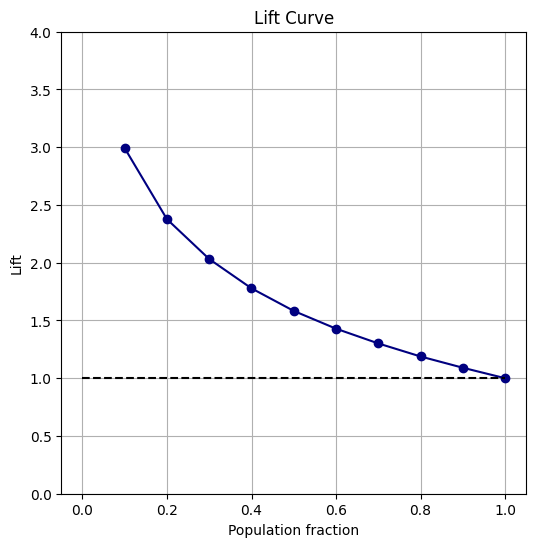

In [485]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(lift_table['cum_customers']/lift_table['cum_customers'].iloc[-1],
         lift_table['Lift'], marker='o', color='#000080')
plt.plot([0,1], [1,1], 'k--', label='Random')
plt.xlabel('Population fraction')
plt.ylabel('Lift')
plt.ylim(0,4)
plt.title('Lift Curve')
plt.grid(True)
plt.show()

### ROC curve AUC number

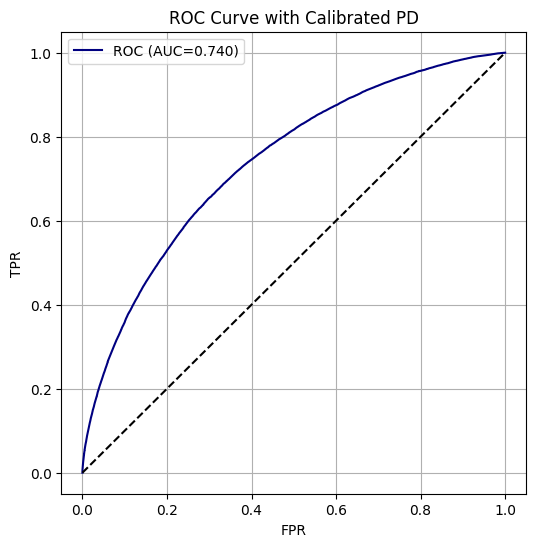

In [486]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df_score['Default'], df_score['Adj_PD'])
auc = roc_auc_score(df_score['Default'], df_score['Adj_PD'])

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.3f})', color='#000080')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve with Calibrated PD')
plt.legend()
plt.grid(True)
plt.show()

### GINI index

In [487]:
gini = 2*auc-1
gini

0.480618884729447

### KS analysis

In [488]:
pred_proba = df_score['Adj_PD']
default = df_score['Default']

KS_data = pd.DataFrame({
    'pd': pred_proba,
    'default': default
})

In [489]:
KS_data = KS_data.sort_values(by='pd', ascending=True).reset_index(drop=True)
KS_data

,pd,default
0,0.00474593,0
1,0.00474593,0
2,0.00474593,0
3,0.00474593,0
4,0.00474593,0
...,...,...
255342,0.76500892,1
255343,0.76500892,1
255344,0.76500892,1
255345,0.79221705,1


In [490]:
KS_data['cum_good'] = (KS_data['default'] == 0).cumsum() / (KS_data['default'] == 0).sum()
KS_data['cum_bad'] = (KS_data['default'] == 1).cumsum() / (KS_data['default'] == 1).sum()
KS_data['KS'] = KS_data['cum_good'] - KS_data['cum_bad']

KS_statistic = np.max(np.abs(KS_data['cum_good'] - KS_data['cum_bad']))

print(f"KS statistic: {KS_statistic:.6f}")

KS statistic: 0.354702


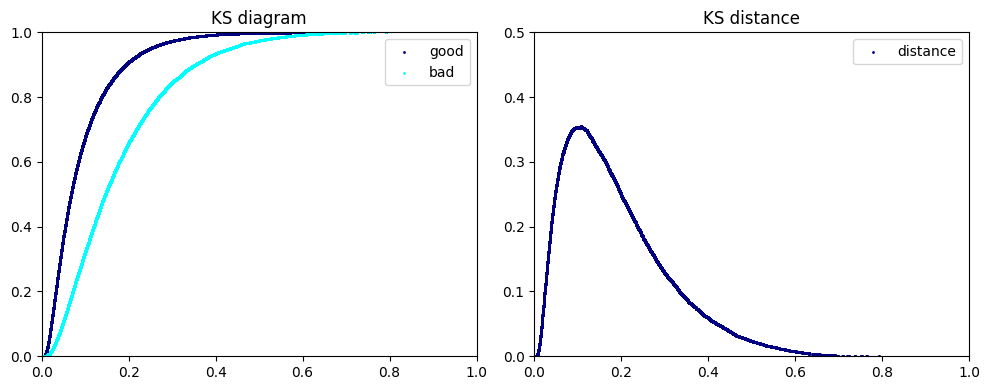

In [491]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].scatter(x=KS_data['pd'], y=KS_data['cum_good'], s=1, color='#000080')
axs[0].scatter(x=KS_data['pd'], y=KS_data['cum_bad'], s=1, color='cyan')
axs[0].set_title('KS diagram')
axs[0].legend(['good', 'bad'])
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)

axs[1].scatter(x=KS_data['pd'], y=KS_data['KS'], s=1, color='#000080')
axs[1].set_title('KS distance')
axs[1].legend(['distance', 'max KS'])
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,0.5)

plt.tight_layout()
plt.show()

## Rating scale

I have created a rating scale from 1 to 6 (its not a standard scale). Loans are ranking based on this scale. This scale helps to understand the pd result.

| Rating | Range |
| ------ | ------------ |
| 1      | 0 – 0.01     |
| 2      | 0.01 – 0.03  |
| 3      | 0.03 – 0.07  |
| 4      | 0.07 – 0.15  |
| 5      | 0.15 – 0.30  |
| 6      | 0.30 – 1.0   |

In [492]:
def rating_convert(x):
    if x <= 0.01:
        return 1
    elif 0.01 < x <= 0.03:
        return 2
    elif 0.03 < x <= 0.07:
        return 3
    elif 0.07 < x <= 0.15:
        return 4
    elif 0.15 < x <= 0.30:
        return 5
    else:
        return 6

df_score['Rating'] = df_score['Adj_PD'].apply(rating_convert)

df_score

,LoanID,Age,Income,LoanAmount,MonthsEmployed,InterestRate,EmploymentType,Default,beta_age,beta_income,beta_loanamount,beta_months_employed,beta_interest,beta_employment,Logit,PD,Adj_PD,Rating
0,I38PQUQS96,56,85994,50587,80,15.23000000,Full-time,0,-1.28007592,-1.35015397,0.15066763,-0.79647601,0.78597910,0.00000000,-3.59254627,0.02679065,0.02273886,2
1,HPSK72WA7R,69,50432,124440,15,4.81000000,Full-time,0,-1.71094213,-1.16221464,0.36807216,0.00000000,0.00000000,0.00000000,-3.60757171,0.02640167,0.02240736,2
2,C1OZ6DPJ8Y,46,84208,129188,26,21.17000000,Unemployed,1,-0.94335719,-1.35015397,0.36807216,-0.16659042,1.31528886,0.44504391,-1.43418375,0.19244764,0.16765820,5
3,V2KKSFM3UN,32,31713,44799,0,7.07000000,Full-time,0,-0.53872958,-0.79516293,0.15066763,0.00000000,0.28825258,0.00000000,-1.99745940,0.11946993,0.10288322,4
4,EY08JDHTZP,60,20437,9139,8,6.51000000,Unemployed,0,-1.71094213,0.00000000,0.00000000,0.00000000,0.28825258,0.44504391,-2.08013274,0.11104286,0.09549924,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,109,14.11000000,Full-time,0,0.00000000,-0.79516293,0.84862776,-1.01399480,0.78597910,0.00000000,-1.27703797,0.21805485,0.19074602,5
255343,98R4KDHNND,32,51953,189899,14,11.55000000,Part-time,1,-0.53872958,-1.16221464,0.69840725,0.00000000,0.53640642,0.28704250,-1.28157515,0.21728222,0.19004663,5
255344,XQK1UUUNGP,56,84820,208294,70,5.29000000,Self-employed,0,-1.28007592,-1.35015397,0.84862776,-0.57708860,0.00000000,0.22808601,-3.23309182,0.03793923,0.03225724,3
255345,JAO28CPL4H,42,85109,60575,40,20.90000000,Part-time,0,-0.94335719,-1.35015397,0.15066763,-0.36936714,1.31528886,0.28704250,-2.01236641,0.11791063,0.10151545,4


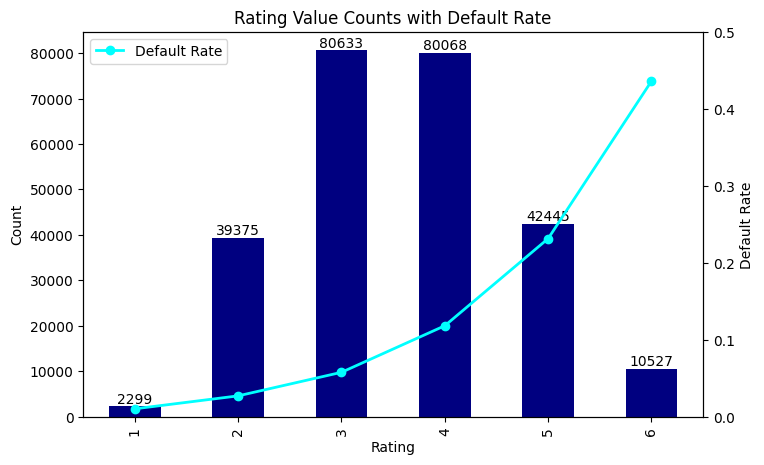

In [493]:
rating_counts = df_score['Rating'].value_counts().sort_index()
ax = rating_counts.plot(kind='bar', color='#000080', figsize=(8,5))

plt.title('Rating Value Counts with Default Rate')
plt.xlabel('Rating')
plt.ylabel('Count')

ax.bar_label(ax.containers[0])

default_rate = df_score.groupby('Rating')['Default'].mean().sort_index()

ax2 = ax.twinx()
ax2.plot(default_rate.index-1, default_rate.values, color='cyan', marker='o', linewidth=2, label='Default Rate')
ax2.set_ylabel('Default Rate')
ax2.set_ylim(0, 0.5)
ax2.legend(loc='upper left')

plt.show()

In [494]:
print(default_rate)

Rating
1   0.01043932
2   0.02725079
3   0.05785472
4   0.11832442
5   0.23152315
6   0.43602166
Name: Default, dtype: float64


## Model monitoring

### Population stability index (PSI)

The Population Stability Index is a statistical measure used to monitor changes in the distribution of a variable or a model score over time. A high PSI value may indicate population drift or model deterioration, suggesting that the original model assumptions may no longer hold, and model recalibration or redevelopment may be necessary.



$$PSI = \sum_{i=1}^{K} \Big[(P Actual_i - P Expected_i) \cdot \ln\left(\frac{P Actual_i)}{P Expected_i)}\right)\Big]$$

|**Population Stability index (PSI)**|**Interpretation**|
|--------------------------|------------------------------|
|PSI < 0.1|No significant population change|
|0.1 ≤ PSI < 0.25|Moderate change, monitor carefully|
|PSI ≥ 0.25|Significant change, model review recommended|

**The temporal data required for calculating the PSI are missing from the database. It is not possible to create data cohorts. This document only contains the PSI description and methodology.**

## Conclusion

Overall, it can be stated that the model delivers acceptable performance (we do not have information on PSI to determine variables and model temporal distributions). The AUC value of 74% is considered stable; a model performs excellently when above 80%. The Gini Index (discriminatory power), at 48%, which reach within the acceptable range (>45%). The KS separation curve, with a value of 35.5%, is acceptable. The lift curve shows that the top 10% of borrowers ranked by risk accounts for three times more defaulters than a randomly selected group of the same size.